## **1. Business Understanding:**

In summary, the business understanding for the provided case study involves:

1. **Objective**: Develop a reliable forecasting model for predicting the active power generation of the solar plant accurately, enabling efficient resource allocation and grid management.

2. **Stakeholders**: Identify key stakeholders including solar plant operators, energy grid managers, regulatory bodies, and energy market participants who will benefit from the forecasting model.

3. **Use Cases**: Understand how the forecasting model will optimize energy production schedules, facilitate grid stability, and inform trading decisions in energy markets.

4. **Impact**: Assess the potential impact of accurate forecasting on cost reduction, improved reliability of energy supply, and achieving sustainability goals.

5. **Performance Metrics**: Define metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or Mean Absolute Percentage Error (MAPE) to evaluate the forecasting model's performance.

6. **Integration**: Consider integration into existing systems or workflows, understanding data flow, model deployment strategies, and communication channels for sharing forecasted results with stakeholders.

Thorough understanding of these aspects allows data scientists to tailor their approach to developing a forecasting model that meets the specific needs and expectations of stakeholders involved in managing the solar plant and the broader energy ecosystem.

## **2. Data Cleaning**

Data cleaning is a crucial step in the data science process that involves identifying and correcting errors or inconsistencies in the dataset to ensure its integrity and reliability for analysis. In the context of the provided case study, data cleaning for the solar plant dataset may include the following steps:

1. **Handling Missing Values**:
   - Identify columns with missing values.
   - Decide on the appropriate method for handling missing values (e.g., imputation, deletion).
   - Consider domain knowledge and the impact of missing values on the analysis.

2. **Removing Duplicates**:
   - Check for and remove duplicate rows in the dataset.
   - Ensure each observation is unique and representative.

3. **Addressing Outliers**:
   - Identify outliers in numerical features that may skew the analysis.
   - Determine whether outliers are errors or valid data points.
   - Apply appropriate techniques to handle outliers (e.g., removing, capping, transforming).

4. **Standardizing Data Formats**:
   - Check for inconsistencies in data formats (e.g., date-time formats, units of measurement).
   - Standardize formats across the dataset to ensure consistency and ease of analysis.

5. **Handling Inconsistent Data**:
   - Identify inconsistencies in data entries (e.g., typos, mislabeled categories).
   - Correct or standardize inconsistent data entries to maintain data integrity.

6. **Dealing with Irrelevant Columns**:
   - Evaluate the relevance of each feature to the analysis and modeling objectives.
   - Remove irrelevant columns that do not contribute to the forecasting model.

7. **Data Transformation**:
   - Perform transformations on features if necessary (e.g., log transformation, normalization) to improve model performance.

8. **Checking Data Integrity**:
   - Validate data integrity after cleaning to ensure that data quality is maintained.
   - Verify that all data manipulation steps are accurately documented for reproducibility.

By thoroughly cleaning the data, data scientists can ensure that the forecasting model is built on a solid foundation, leading to more accurate predictions and reliable insights for stakeholders. Additionally, documenting the data cleaning process is essential for transparency and reproducibility in the analysis.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import mplcursors 


In [2]:
df = pd.read_csv("Solar_Generation.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62655 entries, 0 to 62654
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date_Time                 62654 non-null  object 
 1   RY VOLTAGE                62654 non-null  float64
 2   YB VOLTAGE                62654 non-null  float64
 3   BR VOLTAGE                62654 non-null  float64
 4   R PHASE CURRENT           62654 non-null  float64
 5   Y PHASE CURRENT           62654 non-null  float64
 6   B PHASE CURRENT           62654 non-null  float64
 7   PF                        62654 non-null  float64
 8    FREQUENCY                62654 non-null  float64
 9   APPARENT POWER            62654 non-null  float64
 10  ACTIVE POWER              62654 non-null  float64
 11  REACTIVE POWER            62654 non-null  float64
 12  HORIZONTAL RADIATION      62654 non-null  float64
 13  TILT_RADIATION            62654 non-null  float64
 14  DAY HO

In [4]:
pd.set_option('display.max_columns', None)

df.head()

,Date_Time,RY VOLTAGE,YB VOLTAGE,BR VOLTAGE,R PHASE CURRENT,Y PHASE CURRENT,B PHASE CURRENT,PF,FREQUENCY,APPARENT POWER,ACTIVE POWER,REACTIVE POWER,HORIZONTAL RADIATION,TILT_RADIATION,DAY HORIZONTAL RADIATION,DAY TILT RADIATION,MODULE TEMPERATURE,AMBIENT TEMPERATURE,WIND SPEED,WIND DIRECTION,HUMIDITY,RAIN
0,01-01-2020 00:00,68759.56641,68742.19531,68300.51563,2.1605,1.9296,2.5329,-0.204,100.098999,129.770001,-79.580002,-27.380005,0.0,0.0,9.379745,10.732933,17.000000,20.500000,1.5,84.199997,85.699997,0.0
1,01-01-2020 00:10,68302.45703,68265.07031,67853.40625,2.1000,1.8774,2.4804,-0.044,99.993000,125.780003,-77.770001,-6.419998,0.0,0.0,9.379745,10.732933,17.200001,20.600000,0.7,76.099998,86.000000,0.0
2,01-01-2020 00:20,68210.21484,68185.65234,67773.36328,2.0753,1.8809,2.4350,-0.024,99.968998,124.340000,-76.830002,-3.380001,0.0,0.0,0.000000,0.000000,17.200001,20.700001,0.9,92.800003,86.000000,0.0
3,01-01-2020 00:30,68324.65234,68296.44141,67882.87891,2.0419,1.8650,2.4225,-0.021,100.057003,123.510002,-76.010002,-5.330002,0.0,0.0,0.000000,0.000000,16.900000,20.500000,0.7,68.000000,86.400002,0.0
4,01-01-2020 00:40,68393.61719,68388.14453,67939.93750,2.0887,1.9138,2.4445,-0.059,100.033001,125.800003,-76.989998,-9.790001,0.0,0.0,0.000000,0.000000,16.700001,20.400000,0.7,92.400002,87.199997,0.0


In [5]:
# df.tail(10)

In [6]:
# Count missing values (empty strings, None, etc.)
missing_values_count = df.isnull().sum()

# Count NaN values
nan_values_count = df.isna().sum()

# # Display the count of missing values and NaN values in each column
# print("Missing values in each column:")
# print(missing_values_count)

# print("\nNaN values in each column:")
# print(nan_values_count)

In [7]:
df = df.dropna()
df.shape

(62654, 22)

In [8]:
duplicate_rows = df.duplicated()

# Count duplicate rows
num_duplicates = duplicate_rows.sum()
# duplicate_rows = df1[df1.duplicated()]


# Display the number of duplicate rows
print("Number of duplicate rows:", num_duplicates)
# print(duplicate_rows.head(1))

Number of duplicate rows: 5704


In [9]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(56950, 22)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56950 entries, 0 to 56949
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date_Time                 56950 non-null  object 
 1   RY VOLTAGE                56950 non-null  float64
 2   YB VOLTAGE                56950 non-null  float64
 3   BR VOLTAGE                56950 non-null  float64
 4   R PHASE CURRENT           56950 non-null  float64
 5   Y PHASE CURRENT           56950 non-null  float64
 6   B PHASE CURRENT           56950 non-null  float64
 7   PF                        56950 non-null  float64
 8    FREQUENCY                56950 non-null  float64
 9   APPARENT POWER            56950 non-null  float64
 10  ACTIVE POWER              56950 non-null  float64
 11  REACTIVE POWER            56950 non-null  float64
 12  HORIZONTAL RADIATION      56950 non-null  float64
 13  TILT_RADIATION            56950 non-null  float64
 14  DAY HO

In [11]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56950 entries, 0 to 56949
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date_Time                 56950 non-null  datetime64[ns]
 1   RY VOLTAGE                56950 non-null  float64       
 2   YB VOLTAGE                56950 non-null  float64       
 3   BR VOLTAGE                56950 non-null  float64       
 4   R PHASE CURRENT           56950 non-null  float64       
 5   Y PHASE CURRENT           56950 non-null  float64       
 6   B PHASE CURRENT           56950 non-null  float64       
 7   PF                        56950 non-null  float64       
 8    FREQUENCY                56950 non-null  float64       
 9   APPARENT POWER            56950 non-null  float64       
 10  ACTIVE POWER              56950 non-null  float64       
 11  REACTIVE POWER            56950 non-null  float64       
 12  HORIZONTAL RADIATI

In [12]:
# Count different values in each column
unique_counts = df.nunique()

# Display the count of unique values in each column
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
Date_Time                   56564
RY VOLTAGE                  54556
YB VOLTAGE                  54639
BR VOLTAGE                  54525
R PHASE CURRENT             44743
Y PHASE CURRENT             41123
B PHASE CURRENT             43295
PF                           2221
 FREQUENCY                   2207
APPARENT POWER              48834
ACTIVE POWER                34849
REACTIVE POWER              51415
HORIZONTAL RADIATION        11925
TILT_RADIATION              12241
DAY HORIZONTAL RADIATION    28347
DAY TILT RADIATION          28339
MODULE TEMPERATURE            544
AMBIENT TEMPERATURE           275
WIND SPEED                    100
WIND DIRECTION               3546
HUMIDITY                      887
RAIN                            4
dtype: int64


In [13]:

duplicate_mask = df.duplicated('Date_Time', keep=False)
duplicate_rows = df[duplicate_mask]

duplicate_count = duplicate_rows['Date_Time'].value_counts()

print(duplicate_count)
print(f"Total : {sum(duplicate_count)}")


2020-07-22 08:20:00    4
2020-01-06 09:40:00    4
2020-02-11 07:50:00    4
2020-12-25 11:20:00    4
2020-12-26 07:50:00    4
                      ..
2020-07-18 05:20:00    2
2020-07-18 04:00:00    2
2020-07-18 03:40:00    2
2020-07-16 07:00:00    2
2020-12-26 12:50:00    2
Name: Date_Time, Length: 366, dtype: int64
Total : 752


In [14]:
df.drop_duplicates(subset='Date_Time', keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56564 entries, 0 to 56563
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date_Time                 56564 non-null  datetime64[ns]
 1   RY VOLTAGE                56564 non-null  float64       
 2   YB VOLTAGE                56564 non-null  float64       
 3   BR VOLTAGE                56564 non-null  float64       
 4   R PHASE CURRENT           56564 non-null  float64       
 5   Y PHASE CURRENT           56564 non-null  float64       
 6   B PHASE CURRENT           56564 non-null  float64       
 7   PF                        56564 non-null  float64       
 8    FREQUENCY                56564 non-null  float64       
 9   APPARENT POWER            56564 non-null  float64       
 10  ACTIVE POWER              56564 non-null  float64       
 11  REACTIVE POWER            56564 non-null  float64       
 12  HORIZONTAL RADIATI

## **3.Exploratory Data Analysis (EDA)**

 EDA is a critical step in understanding the structure, patterns, and relationships within the data before proceeding with modeling. For a forecasting model of solar plant generation, EDA helps in gaining insights into the historical active power data, identifying trends, seasonality, outliers, and correlations with other variables. Below are steps are followed for EDA:

1. **Load the Data:** Import the dataset containing historical data of the solar plant's active power generation and relevant environmental factors.

2. **Check Data Integrity:** Verify data types, check for missing values, and ensure the correctness of date-time variables.

3. **Descriptive Statistics:** Compute summary statistics such as mean, median, standard deviation, and quartiles for active power generation and other relevant features.

4. **Time Series Visualization:** Plot the time series of active power generation to observe trends, seasonality, and fluctuations over time.

5. **Seasonal Decomposition:** Decompose the time series into trend, seasonality, and residual components to understand underlying patterns.

6. **Correlation Analysis:** Explore the correlation between active power generation and environmental factors to identify relationships.

7. **Distribution Analysis:** Examine the distribution of active power generation and other variables to identify outliers and understand data distribution.

8. **Time Series Analysis:** Analyze autocorrelation and partial autocorrelation functions to identify lagged relationships for forecasting.

9. **Outlier Detection:** Identify and investigate outliers or anomalies that may impact the forecasting model.

10. **Feature Engineering Ideas:** Brainstorm potential features or transformations based on EDA findings to improve the forecasting model's performance.

11. **Interpretation and Insights:** Summarize key findings and provide insights into data patterns, correlations, and potential challenges or opportunities.

By following these steps, I gain valuable insights into the data, identify patterns, and inform subsequent steps in feature engineering, modeling, and evaluation for the solar plant generation forecasting project.


In [15]:
df.describe()

,RY VOLTAGE,YB VOLTAGE,BR VOLTAGE,R PHASE CURRENT,Y PHASE CURRENT,B PHASE CURRENT,PF,FREQUENCY,APPARENT POWER,ACTIVE POWER,REACTIVE POWER,HORIZONTAL RADIATION,TILT_RADIATION,DAY HORIZONTAL RADIATION,DAY TILT RADIATION,MODULE TEMPERATURE,AMBIENT TEMPERATURE,WIND SPEED,WIND DIRECTION,HUMIDITY,RAIN
count,56564.000000,56564.000000,56564.000000,56564.000000,56564.000000,56564.000000,56564.000000,56564.000000,56564.000000,56564.000000,56564.000000,56564.000000,56564.000000,56564.000000,56564.000000,56564.000000,56564.000000,56564.000000,56564.000000,56564.000000,56564.000000
mean,68410.420535,68308.495862,67907.189877,235.689671,235.186620,235.299528,-0.513389,99.532298,13739.709756,13598.716713,-642.634566,219.254852,234.688537,2.661975,2.844413,28.389062,25.780274,2.395317,171.403136,65.538339,0.000156
std,4775.033161,4793.302720,4734.216982,316.505425,316.476672,316.232530,1.214712,6.731902,18409.046049,18475.527745,1010.684874,317.399385,332.935138,2.548153,2.727436,11.469688,5.024246,13.848647,93.032490,22.018382,0.006512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.999000,0.000000,0.000000,-222.029999,-3257.920044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67794.647465,67607.848635,67325.826175,2.592775,2.154875,2.819450,-1.996000,99.940998,148.860001,-81.939998,-749.875015,0.000000,0.000000,0.000084,0.000084,20.400000,22.600000,1.200000,77.699997,49.500000,0.000000
50%,68813.802735,68755.556640,68325.042970,5.710400,4.706700,5.227350,-0.241000,100.021000,318.410004,0.000000,-141.300001,4.640000,4.533333,2.250323,2.379338,24.400000,25.500000,2.100000,189.800003,67.400002,0.000000
75%,69817.532227,69776.786130,69310.339842,468.007775,467.358501,467.081207,0.181000,100.083999,27424.832030,27416.834715,-28.730000,370.586655,411.359985,5.099415,5.363296,36.500000,29.200001,3.200000,255.100006,84.300003,0.000000
max,72238.816410,72266.535160,71658.269530,892.824982,892.709992,892.590393,2.000000,100.654003,52949.718750,52852.369140,149.290001,1413.493408,1437.440063,13.493360,14.782917,64.099998,39.500000,3276.699951,3276.699951,100.000000,0.600000


In [16]:
descriptive_stats = df.describe()

# Extract specific descriptive statistics
mean_active_power = descriptive_stats.loc['mean', 'ACTIVE POWER']
median_active_power = descriptive_stats.loc['50%', 'ACTIVE POWER']
std_active_power = descriptive_stats.loc['std', 'ACTIVE POWER']
min_active_power = descriptive_stats.loc['min', 'ACTIVE POWER']
max_active_power = descriptive_stats.loc['max', 'ACTIVE POWER']

print("Descriptive Statistics for Active Power Generation:")
print("Mean:", mean_active_power)
print("Median:", median_active_power)
print("Standard Deviation:", std_active_power)
print("Minimum:", min_active_power)
print("Maximum:", max_active_power)

Descriptive Statistics for Active Power Generation:
Mean: 13598.716712936515
Median: 0.0
Standard Deviation: 18475.527745474086
Minimum: -222.029999
Maximum: 52852.36914


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56564 entries, 0 to 56563
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date_Time                 56564 non-null  datetime64[ns]
 1   RY VOLTAGE                56564 non-null  float64       
 2   YB VOLTAGE                56564 non-null  float64       
 3   BR VOLTAGE                56564 non-null  float64       
 4   R PHASE CURRENT           56564 non-null  float64       
 5   Y PHASE CURRENT           56564 non-null  float64       
 6   B PHASE CURRENT           56564 non-null  float64       
 7   PF                        56564 non-null  float64       
 8    FREQUENCY                56564 non-null  float64       
 9   APPARENT POWER            56564 non-null  float64       
 10  ACTIVE POWER              56564 non-null  float64       
 11  REACTIVE POWER            56564 non-null  float64       
 12  HORIZONTAL RADIATI

In [18]:
df2 = df.copy()

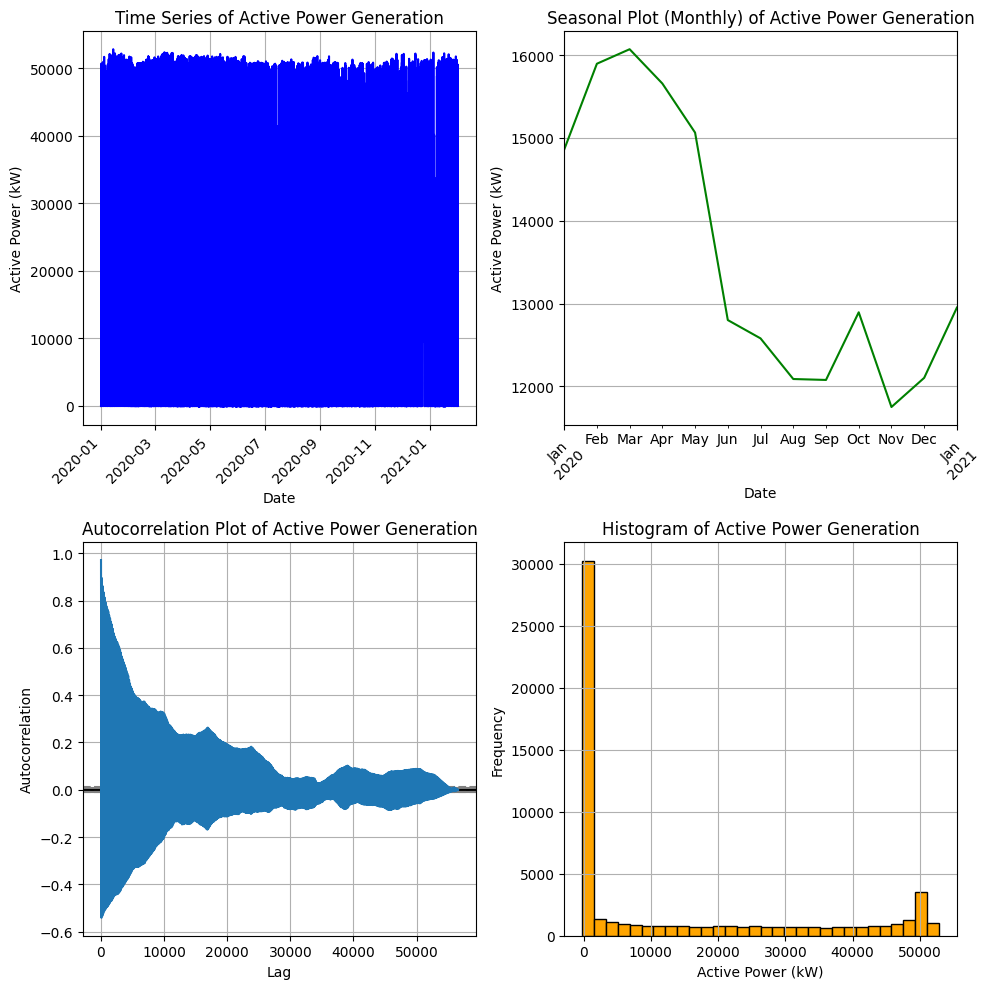

In [19]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Set 'Date_Time' column as the index
df.set_index('Date_Time', inplace=True)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Line Plot of Active Power Generation
df['ACTIVE POWER'].plot(ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Time Series of Active Power Generation')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Active Power (kW)')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(True)

# Seasonal Plot (Monthly)
df.resample('M').mean()['ACTIVE POWER'].plot(ax=axs[0, 1], color='green')
axs[0, 1].set_title('Seasonal Plot (Monthly) of Active Power Generation')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Active Power (kW)')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(True)


# Histogram of Active Power Generation
df['ACTIVE POWER'].hist(ax=axs[1, 1], bins=30, color='orange', edgecolor='black')
axs[1, 1].set_title('Histogram of Active Power Generation')
axs[1, 1].set_xlabel('Active Power (kW)')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

# Autocorrelation Plot of Active Power Generation
pd.plotting.autocorrelation_plot(df['ACTIVE POWER'], ax=axs[1, 0])
axs[1, 0].set_title('Autocorrelation Plot of Active Power Generation')
axs[1, 0].set_xlabel('Lag')
axs[1, 0].set_ylabel('Autocorrelation')
axs[1, 0].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

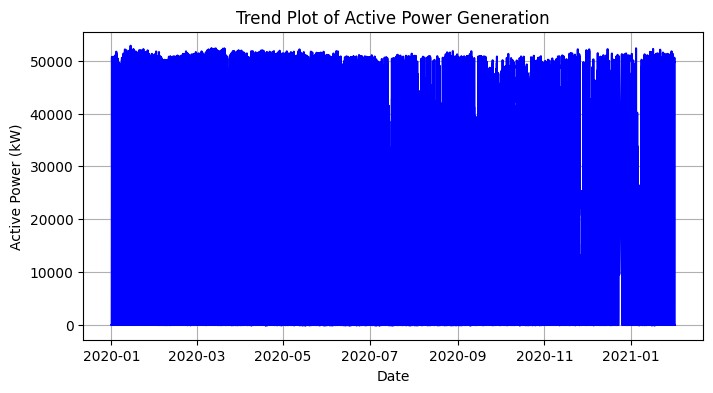

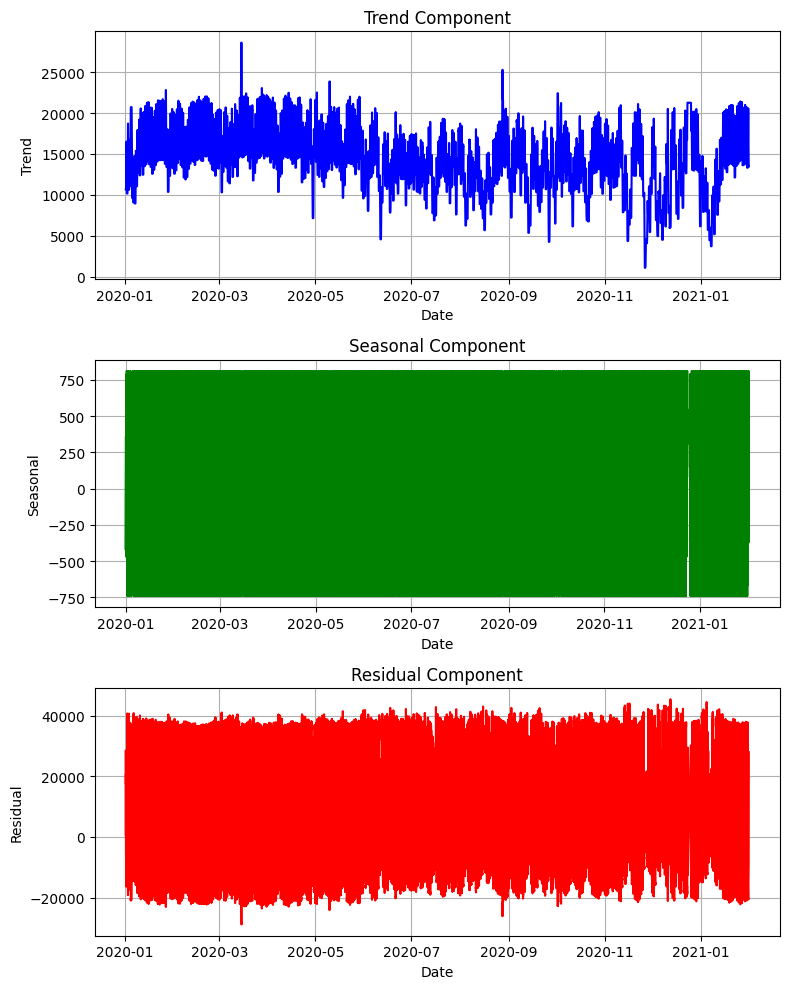

In [20]:
# Trend Plot
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['ACTIVE POWER'], color='blue')
plt.title('Trend Plot of Active Power Generation')
plt.xlabel('Date')
plt.ylabel('Active Power (kW)')
plt.grid(True)
plt.show()

# Seasonal Decomposition
decomposition = seasonal_decompose(df['ACTIVE POWER'], model='additive', period=24*7)  # Weekly seasonality
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(8, 10))
plt.subplot(3, 1, 1)
plt.plot(df.index, trend, color='blue')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(df.index, seasonal, color='green')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(df.index, residual, color='red')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)

plt.tight_layout()
plt.show()


In [21]:
correlation_matrix = df.corr()

active_power_correlation = correlation_matrix['ACTIVE POWER'].drop('ACTIVE POWER')

active_power_correlation_sorted = active_power_correlation.sort_values(ascending=False)

print(active_power_correlation_sorted)


APPARENT POWER              0.999985
R PHASE CURRENT             0.999685
Y PHASE CURRENT             0.999682
B PHASE CURRENT             0.999660
TILT_RADIATION              0.976226
HORIZONTAL RADIATION        0.962150
MODULE TEMPERATURE          0.899838
AMBIENT TEMPERATURE         0.560254
 FREQUENCY                  0.052816
WIND SPEED                  0.033803
DAY TILT RADIATION          0.028903
DAY HORIZONTAL RADIATION    0.024597
WIND DIRECTION              0.014095
RAIN                       -0.016235
BR VOLTAGE                 -0.112180
RY VOLTAGE                 -0.112963
YB VOLTAGE                 -0.143103
HUMIDITY                   -0.492294
PF                         -0.816882
REACTIVE POWER             -0.938466
Name: ACTIVE POWER, dtype: float64


- Strong positive correlations exist between 'ACTIVE POWER' and 'APPARENT POWER', 'R PHASE CURRENT', 'Y PHASE CURRENT', and 'B PHASE CURRENT', indicating a strong linear relationship.
- 'TILT_RADIATION' and 'HORIZONTAL RADIATION' show high positive correlations with 'ACTIVE POWER', suggesting significant impacts on power generation in solar panels.
- 'MODULE TEMPERATURE' has a moderately high positive correlation with 'ACTIVE POWER', indicating its influence on power generation.
- 'AMBIENT TEMPERATURE' and 'FREQUENCY' exhibit weak to moderate positive correlations with 'ACTIVE POWER'.
- 'WIND SPEED', 'DAY TILT RADIATION', 'DAY HORIZONTAL RADIATION', 'WIND DIRECTION', and 'RAIN' have very weak correlations with 'ACTIVE POWER'.
- Negative correlations are observed with 'BR VOLTAGE', 'RY VOLTAGE', 'YB VOLTAGE', 'HUMIDITY', 'PF', and 'REACTIVE POWER', suggesting potential impacts on power generation, but further analysis is needed to understand these relationships.

In [22]:
# 1. Separate dependent and independent variables
X = df.drop(columns=['ACTIVE POWER'])  # Independent variables
y = df['ACTIVE POWER']  # Dependent variable

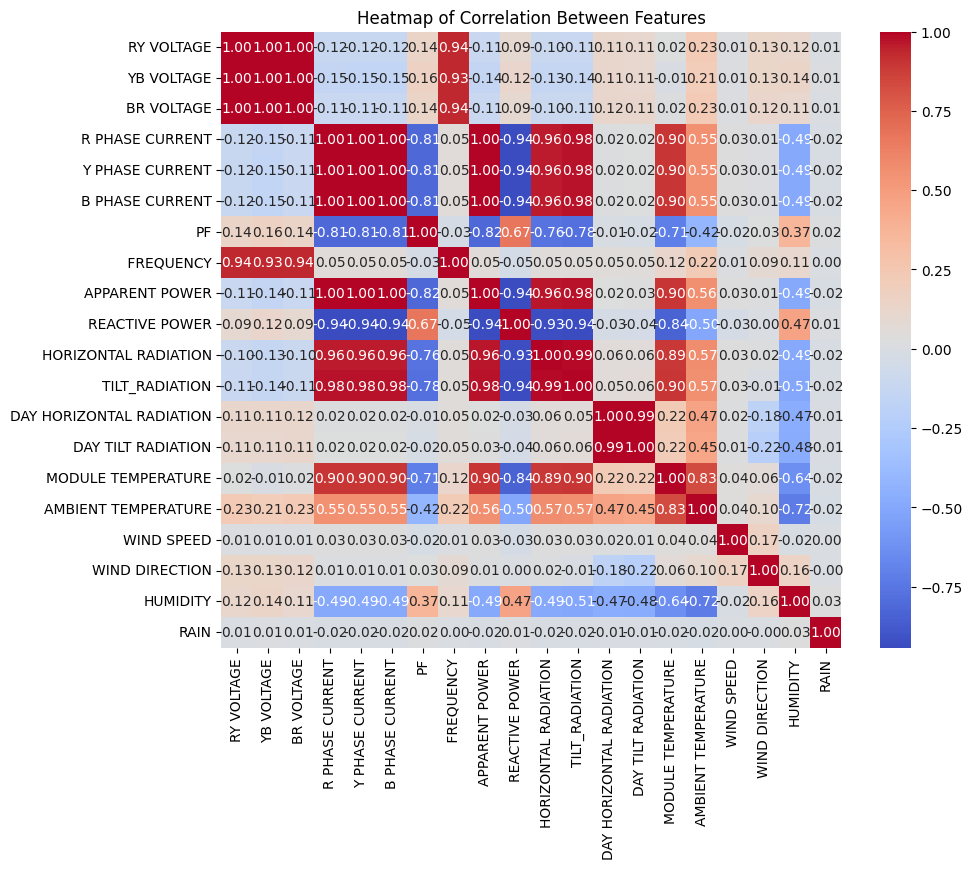

In [23]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Between Features')
plt.show()

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display the VIF data
print(vif_data)


                     feature           VIF
0                 RY VOLTAGE  7.680966e+05
1                 YB VOLTAGE  7.546509e+05
2                 BR VOLTAGE  4.201704e+05
3            R PHASE CURRENT  2.659896e+06
4            Y PHASE CURRENT  2.191595e+06
5            B PHASE CURRENT  6.011440e+05
6                         PF  5.476797e+00
7                  FREQUENCY  4.532062e+03
8             APPARENT POWER  4.724442e+03
9             REACTIVE POWER  3.218712e+01
10      HORIZONTAL RADIATION  7.181309e+01
11            TILT_RADIATION  1.177180e+02
12  DAY HORIZONTAL RADIATION  2.367571e+02
13        DAY TILT RADIATION  2.376817e+02
14        MODULE TEMPERATURE  2.444464e+02
15       AMBIENT TEMPERATURE  3.896251e+02
16                WIND SPEED  1.065984e+00
17            WIND DIRECTION  6.297627e+00
18                  HUMIDITY  3.837411e+01
19                      RAIN  1.002145e+00


In [25]:
# Drop specified columns
columns_to_drop = ['YB VOLTAGE', 'BR VOLTAGE', 'Y PHASE CURRENT', 'B PHASE CURRENT']
X_2 = X.drop(columns=columns_to_drop)


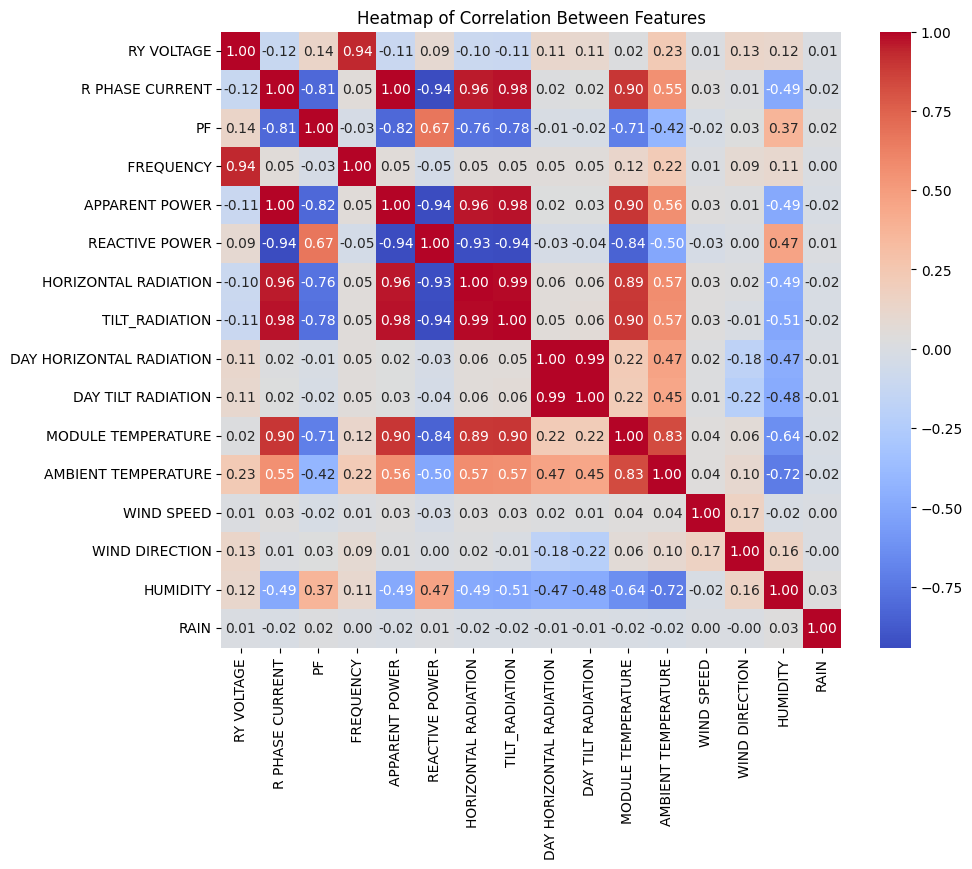

In [26]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Between Features')
plt.show()

In [27]:

# Calculate VIF for each feature in X_2
vif_data = pd.DataFrame()
vif_data["feature"] = X_2.columns
vif_data["VIF"] = [variance_inflation_factor(X_2.values, i) for i in range(len(X_2.columns))]

# Display the VIF data
print(vif_data)


                     feature          VIF
0                 RY VOLTAGE  3949.554309
1            R PHASE CURRENT  4723.294483
2                         PF     4.723249
3                  FREQUENCY  3716.103919
4             APPARENT POWER  4620.085562
5             REACTIVE POWER    21.761554
6       HORIZONTAL RADIATION    70.892600
7             TILT_RADIATION   116.761575
8   DAY HORIZONTAL RADIATION   230.233793
9         DAY TILT RADIATION   230.866217
10        MODULE TEMPERATURE   240.591402
11       AMBIENT TEMPERATURE   374.536813
12                WIND SPEED     1.065413
13            WIND DIRECTION     6.026374
14                  HUMIDITY    30.260665
15                      RAIN     1.001940


In [28]:
columns_to_drop = ['APPARENT POWER']
X3 = X_2.drop(columns= columns_to_drop)
# Calculate VIF for each feature in X_2
vif_data = pd.DataFrame()
vif_data["feature"] = X3.columns
vif_data["VIF"] = [variance_inflation_factor(X3.values, i) for i in range(len(X3.columns))]

# Display the VIF data
print(vif_data)

                     feature          VIF
0                 RY VOLTAGE  2945.000389
1            R PHASE CURRENT    69.692557
2                         PF     4.705906
3                  FREQUENCY  2778.181933
4             REACTIVE POWER    18.885449
5       HORIZONTAL RADIATION    70.279221
6             TILT_RADIATION   116.497379
7   DAY HORIZONTAL RADIATION   230.213920
8         DAY TILT RADIATION   230.792308
9         MODULE TEMPERATURE   238.749642
10       AMBIENT TEMPERATURE   370.619810
11                WIND SPEED     1.065342
12            WIND DIRECTION     6.024868
13                  HUMIDITY    30.012583
14                      RAIN     1.001937


In [29]:
columns_to_drop = ['RY VOLTAGE']
X4 = X3.drop(columns= columns_to_drop)
# Calculate VIF for each feature in X_2
vif_data = pd.DataFrame()
vif_data["feature"] = X4.columns
vif_data["VIF"] = [variance_inflation_factor(X4.values, i) for i in range(len(X4.columns))]

# Display the VIF data
print(vif_data)

                     feature         VIF
0            R PHASE CURRENT   64.744612
1                         PF    4.705568
2                  FREQUENCY  187.948365
3             REACTIVE POWER   18.111078
4       HORIZONTAL RADIATION   70.258457
5             TILT_RADIATION  116.341062
6   DAY HORIZONTAL RADIATION  229.962954
7         DAY TILT RADIATION  230.585667
8         MODULE TEMPERATURE  238.712233
9        AMBIENT TEMPERATURE  356.843247
10                WIND SPEED    1.065239
11            WIND DIRECTION    5.932841
12                  HUMIDITY   29.904617
13                      RAIN    1.001874


In [30]:
columns_to_drop = ['AMBIENT TEMPERATURE']
X5 = X4.drop(columns= columns_to_drop)
# Calculate VIF for each feature in X_2
vif_data = pd.DataFrame()
vif_data["feature"] = X5.columns
vif_data["VIF"] = [variance_inflation_factor(X5.values, i) for i in range(len(X5.columns))]

# Display the VIF data
print(vif_data)

                     feature         VIF
0            R PHASE CURRENT   60.856678
1                         PF    4.698915
2                  FREQUENCY   84.715516
3             REACTIVE POWER   17.893555
4       HORIZONTAL RADIATION   70.102042
5             TILT_RADIATION  114.384836
6   DAY HORIZONTAL RADIATION  225.621798
7         DAY TILT RADIATION  227.944230
8         MODULE TEMPERATURE   66.736497
9                 WIND SPEED    1.065134
10            WIND DIRECTION    5.815564
11                  HUMIDITY   23.688979
12                      RAIN    1.001810


In [31]:
columns_to_drop = ['DAY TILT RADIATION']
X6 = X5.drop(columns= columns_to_drop)
# Calculate VIF for each feature in X_2
vif_data = pd.DataFrame()
vif_data["feature"] = X6.columns
vif_data["VIF"] = [variance_inflation_factor(X6.values, i) for i in range(len(X6.columns))]

# Display the VIF data
print(vif_data)

                     feature         VIF
0            R PHASE CURRENT   60.835584
1                         PF    4.691291
2                  FREQUENCY   78.349265
3             REACTIVE POWER   17.879803
4       HORIZONTAL RADIATION   67.551873
5             TILT_RADIATION  110.163187
6   DAY HORIZONTAL RADIATION    3.254310
7         MODULE TEMPERATURE   64.611586
8                 WIND SPEED    1.064017
9             WIND DIRECTION    5.331241
10                  HUMIDITY   23.103850
11                      RAIN    1.001799


In [32]:
columns_to_drop = ['TILT_RADIATION']
X7 = X6.drop(columns= columns_to_drop)
# Calculate VIF for each feature in X_2
vif_data = pd.DataFrame()
vif_data["feature"] = X7.columns
vif_data["VIF"] = [variance_inflation_factor(X7.values, i) for i in range(len(X7.columns))]

# Display the VIF data
print(vif_data)

                     feature        VIF
0            R PHASE CURRENT  50.336880
1                         PF   4.690466
2                  FREQUENCY  78.207201
3             REACTIVE POWER  17.685159
4       HORIZONTAL RADIATION  22.564490
5   DAY HORIZONTAL RADIATION   3.254294
6         MODULE TEMPERATURE  64.534488
7                 WIND SPEED   1.063701
8             WIND DIRECTION   5.221962
9                   HUMIDITY  23.019045
10                      RAIN   1.001799


In [33]:
columns_to_drop = ['MODULE TEMPERATURE']
X8 = X7.drop(columns= columns_to_drop)
# Calculate VIF for each feature in X_2
vif_data = pd.DataFrame()
vif_data["feature"] = X8.columns
vif_data["VIF"] = [variance_inflation_factor(X8.values, i) for i in range(len(X8.columns))]

# Display the VIF data
print(vif_data)

                    feature        VIF
0           R PHASE CURRENT  43.784498
1                        PF   4.659410
2                 FREQUENCY  33.193316
3            REACTIVE POWER  17.405110
4      HORIZONTAL RADIATION  21.393445
5  DAY HORIZONTAL RADIATION   3.019310
6                WIND SPEED   1.062629
7            WIND DIRECTION   4.832879
8                  HUMIDITY  18.820824
9                      RAIN   1.001657


In [34]:
columns_to_drop = ['R PHASE CURRENT']
X9 = X8.drop(columns= columns_to_drop)
# Calculate VIF for each feature in X_2
vif_data = pd.DataFrame()
vif_data["feature"] = X9.columns
vif_data["VIF"] = [variance_inflation_factor(X9.values, i) for i in range(len(X9.columns))]

# Display the VIF data
print(vif_data)

                    feature        VIF
0                        PF   2.906375
1                 FREQUENCY  31.251224
2            REACTIVE POWER  10.788925
3      HORIZONTAL RADIATION  15.203483
4  DAY HORIZONTAL RADIATION   2.944140
5                WIND SPEED   1.062478
6            WIND DIRECTION   4.813028
7                  HUMIDITY  18.311687
8                      RAIN   1.001648


In [35]:
columns_to_drop = [' FREQUENCY']
X10 = X9.drop(columns= columns_to_drop)
# Calculate VIF for each feature in X_2
vif_data = pd.DataFrame()
vif_data["feature"] = X10.columns
vif_data["VIF"] = [variance_inflation_factor(X10.values, i) for i in range(len(X10.columns))]

# Display the VIF data
print(vif_data)

                    feature        VIF
0                        PF   2.905581
1            REACTIVE POWER  10.699160
2      HORIZONTAL RADIATION  14.935964
3  DAY HORIZONTAL RADIATION   1.663996
4                WIND SPEED   1.061442
5            WIND DIRECTION   4.425955
6                  HUMIDITY   4.014047
7                      RAIN   1.001366


In [36]:
columns_to_drop = ['HORIZONTAL RADIATION']
X11 = X10.drop(columns= columns_to_drop)
# Calculate VIF for each feature in X_2
vif_data = pd.DataFrame()
vif_data["feature"] = X11.columns
vif_data["VIF"] = [variance_inflation_factor(X11.values, i) for i in range(len(X11.columns))]

# Display the VIF data
print(vif_data)

                    feature       VIF
0                        PF  2.155096
1            REACTIVE POWER  2.514946
2  DAY HORIZONTAL RADIATION  1.629594
3                WIND SPEED  1.061419
4            WIND DIRECTION  4.322065
5                  HUMIDITY  3.999050
6                      RAIN  1.001355


In [37]:

X11.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56564 entries, 2020-01-01 00:00:00 to 2021-01-31 23:50:00
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PF                        56564 non-null  float64
 1   REACTIVE POWER            56564 non-null  float64
 2   DAY HORIZONTAL RADIATION  56564 non-null  float64
 3   WIND SPEED                56564 non-null  float64
 4   WIND DIRECTION            56564 non-null  float64
 5   HUMIDITY                  56564 non-null  float64
 6   RAIN                      56564 non-null  float64
dtypes: float64(7)
memory usage: 3.5 MB


In [38]:
y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 56564 entries, 2020-01-01 00:00:00 to 2021-01-31 23:50:00
Series name: ACTIVE POWER
Non-Null Count  Dtype  
--------------  -----  
56564 non-null  float64
dtypes: float64(1)
memory usage: 883.8 KB


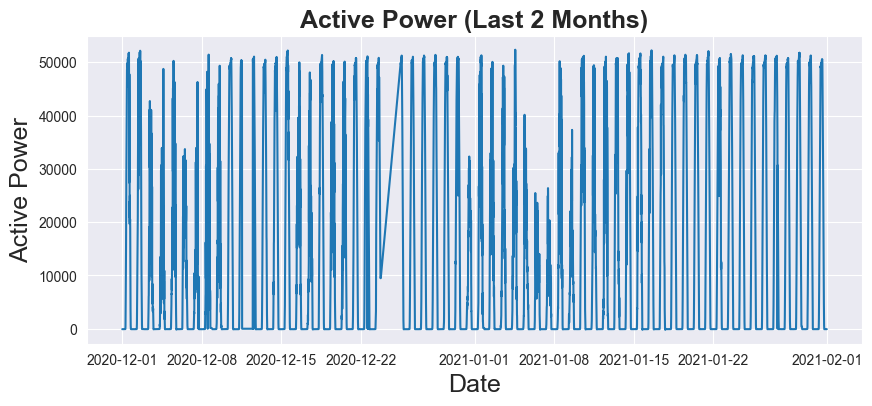

In [39]:
import seaborn as sns

# Set the Seaborn style
sns.set_style("darkgrid")

# Get the integer index corresponding to the last 2 months
last_two_months_index = y.index.searchsorted(y.index[-1] - pd.DateOffset(months=2))

# Slice the Series to include only the last 2 months of data
last_two_months_data = y.iloc[last_two_months_index:]

# Plot the data
plt.figure(figsize=(10,4))
plt.plot(last_two_months_data)
# plt.plot(y)
plt.title("Active Power (Last 2 Months)", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Active Power', fontsize=18)
plt.show()


In [40]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [41]:
df = pd.concat([X11, y], axis=1)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56564 entries, 2020-01-01 00:00:00 to 2021-01-31 23:50:00
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PF                        56564 non-null  float64
 1   REACTIVE POWER            56564 non-null  float64
 2   DAY HORIZONTAL RADIATION  56564 non-null  float64
 3   WIND SPEED                56564 non-null  float64
 4   WIND DIRECTION            56564 non-null  float64
 5   HUMIDITY                  56564 non-null  float64
 6   RAIN                      56564 non-null  float64
 7   ACTIVE POWER              56564 non-null  float64
dtypes: float64(8)
memory usage: 3.9 MB


In [43]:
df.head(15)

,PF,REACTIVE POWER,DAY HORIZONTAL RADIATION,WIND SPEED,WIND DIRECTION,HUMIDITY,RAIN,ACTIVE POWER
Date_Time,,,,,,,,
2020-01-01 00:00:00,-0.204,-27.380005,9.379745,1.5,84.199997,85.699997,0.0,-79.580002
2020-01-01 00:10:00,-0.044,-6.419998,9.379745,0.7,76.099998,86.000000,0.0,-77.770001
2020-01-01 00:20:00,-0.024,-3.380001,0.000000,0.9,92.800003,86.000000,0.0,-76.830002
2020-01-01 00:30:00,-0.021,-5.330002,0.000000,0.7,68.000000,86.400002,0.0,-76.010002
2020-01-01 00:40:00,-0.059,-9.790001,0.000000,0.7,92.400002,87.199997,0.0,-76.989998
2020-01-01 00:50:00,-0.086,-13.689999,0.000000,0.8,102.000000,87.400002,0.0,-77.150002
2020-01-01 01:00:00,-0.068,-11.579998,0.000000,1.0,91.800003,87.400002,0.0,-76.990002
2020-01-01 01:10:00,-0.067,-11.000000,0.000000,0.7,128.899994,88.099998,0.0,-76.980000
2020-01-01 01:20:00,-0.098,-14.550003,0.000000,0.8,111.699997,88.500000,0.0,-76.590000


In [44]:
cols = list(df)[0:8]

In [45]:
print(cols)

['PF', 'REACTIVE POWER', 'DAY HORIZONTAL RADIATION', 'WIND SPEED', 'WIND DIRECTION', 'HUMIDITY', 'RAIN', 'ACTIVE POWER']


In [46]:
df_for_training = df[cols].astype(float)

In [47]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [48]:
df_for_training.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56564 entries, 2020-01-01 00:00:00 to 2021-01-31 23:50:00
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PF                        56564 non-null  float64
 1   REACTIVE POWER            56564 non-null  float64
 2   DAY HORIZONTAL RADIATION  56564 non-null  float64
 3   WIND SPEED                56564 non-null  float64
 4   WIND DIRECTION            56564 non-null  float64
 5   HUMIDITY                  56564 non-null  float64
 6   RAIN                      56564 non-null  float64
 7   ACTIVE POWER              56564 non-null  float64
dtypes: float64(8)
memory usage: 3.9 MB


In [49]:
import numpy as np

trainX = []
trainY = []
index_info = []  # List to store index information

n_past_intervals = 36  # Number of past intervals we want to use to predict the future (equivalent to 1 day)
  # Number of intervals we want to predict (equivalent to 1 day)

for i in range(n_past_intervals, len(df_for_training_scaled)):
    trainX.append(df_for_training_scaled[i - n_past_intervals:i, :])
    trainY.append(df_for_training_scaled[i - 1:i, -1])  # Predicting for the last column, ACTIVE POWER
    index_info.append(df_for_training.index[i])  # Record index information

trainX, trainY, index_info = np.array(trainX), np.array(trainY), np.array(index_info)


In [50]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))
print("index",index_info.shape)

trainX shape == (56528, 36, 8).
trainY shape == (56528, 1).
index (56528,)


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(trainX, trainY, test_size=5000, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shapes of the sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



X_train shape: (51528, 36, 8)
y_train shape: (51528, 1)
X_val shape: (2500, 36, 8)
y_val shape: (2500, 1)
X_test shape: (2500, 36, 8)
y_test shape: (2500, 1)


In [52]:
y_train_index = df_for_training.index[n_past_intervals : n_past_intervals + len(y_train)]
y_val_index = df_for_training.index[n_past_intervals + len(y_train) : n_past_intervals + len(y_train) + len(y_val)]
y_test_index = df_for_training.index[n_past_intervals + len(y_train) + len(y_val) : n_past_intervals + len(y_train) + len(y_val) + len(y_test)]


In [53]:
# Build and compile the model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 36, 64)            18688     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 31137 (121.63 KB)
Trainable params: 31137 (121.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/10
1611/1611 [==============================] - 24s 14ms/step - loss: 0.1748 - val_loss: 0.0152
Epoch 2/10
1611/1611 [==============================] - 22s 14ms/step - loss: 0.0213 - val_loss: 0.0366
Epoch 3/10
1611/1611 [==============================] - 22s 14ms/step - loss: 0.0196 - val_loss: 0.0045
Epoch 4/10
1611/1611 [==============================] - 23s 14ms/step - loss: 0.0204 - val_loss: 0.0030
Epoch 5/10
1611/1611 [==============================] - 23s 14ms/step - loss: 0.0202 - val_loss: 0.0052
Epoch 6/10
1611/1611 [==============================] - 23s 14ms/step - loss: 0.0185 - val_loss: 0.0032
Epoch 7/10
1611/1611 [==============================] - 24s 15ms/step - loss: 0.0185 - val_loss: 0.0026
Epoch 8/10
1611/1611 [==============================] - 24s 15ms/step - loss: 0.0184 - val_loss: 0.0025
Epoch 9/10
1611/1611 [==============================] - 24s 15ms/step - loss: 0.0189 - val_loss: 0.0065
Epoch 10/10
1611/1611 [==============================] - 24s 15m

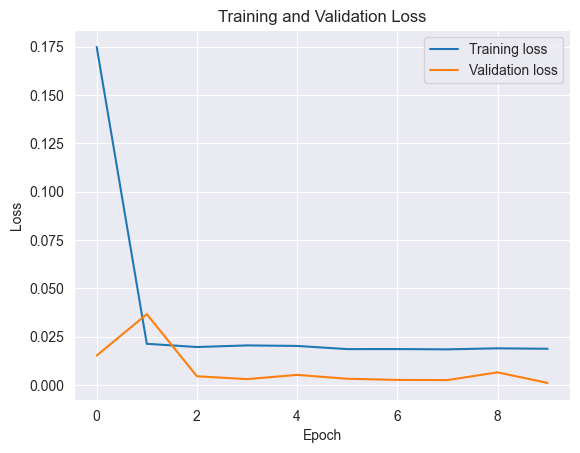

In [55]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [56]:

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

79/79 [==============================] - 0s 5ms/step - loss: 8.7756e-04
Test Loss: 0.0008775643073022366


5/5 [==============================] - 0s 8ms/step


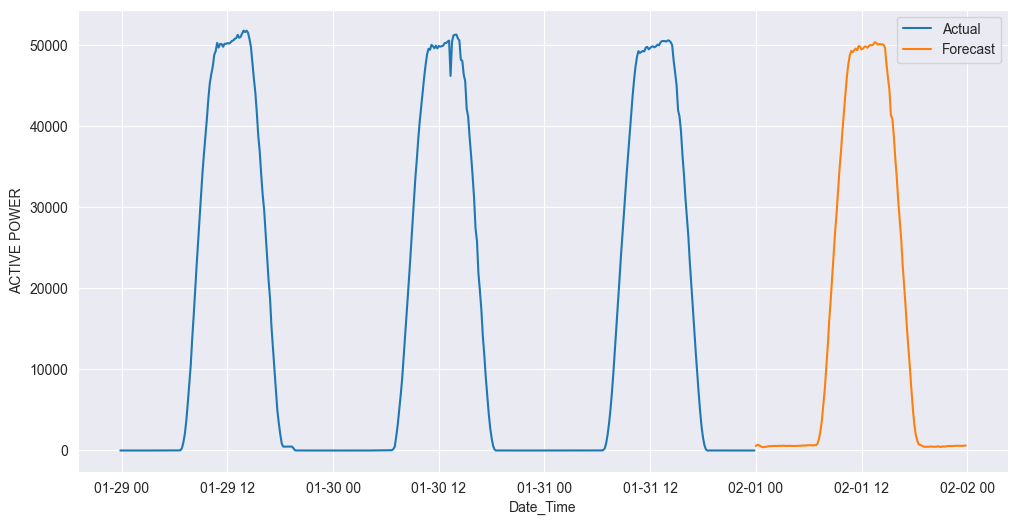

In [57]:
target_col = 'ACTIVE POWER'  
date_col = 'Date_Time'

n_intervals_for_prediction = 144  

last_timestamp = df2[date_col].iloc[-1]
predict_start_date = last_timestamp + pd.Timedelta(minutes=10)
predict_period_dates = pd.date_range(predict_start_date, periods=n_intervals_for_prediction, freq='10T').tolist()


prediction = model.predict(trainX[-n_intervals_for_prediction:])

# Perform inverse transformation to rescale back to original range
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,7]



forecast_dates = pd.date_range(predict_start_date, periods=n_intervals_for_prediction, freq='10T')

df_forecast = pd.DataFrame({'Date_Time': forecast_dates, 'ACTIVE POWER': y_pred_future})

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Filter the original DataFrame to get the last two days of data
end_date = df2['Date_Time'].max()
start_date = end_date - pd.Timedelta(days=3) 
filtered_original = df2[(df2['Date_Time'] >= start_date) & (df2['Date_Time'] <= end_date)]


plt.plot(filtered_original['Date_Time'], filtered_original['ACTIVE POWER'], label='Actual')
plt.plot(df_forecast['Date_Time'], df_forecast['ACTIVE POWER'], label='Forecast')
plt.xlabel('Date_Time')
plt.ylabel('ACTIVE POWER')
plt.legend()
plt.show()


In [58]:
# # Set Date_Time column as index
# df_forecast.set_index('Date_Time', inplace=True)

# # Print the forecast for the next day with timestamp
# print(df_forecast)

In [59]:
copies_y_val_org = np.repeat(y_val, df_for_training.shape[1], axis=-1)
y_val2 = scaler.inverse_transform(copies_y_val_org)[:, 7]
# print(y_val2)

In [60]:
y_val_pred = model.predict(X_val)  # Shape = (n_intervals_for_prediction, 1)
# Perform inverse transformation to rescale back to original range
prediction_copies_y_val = np.repeat(y_val_pred, df_for_training.shape[1], axis=-1)
y_val_pred2 = scaler.inverse_transform(prediction_copies_y_val)[:, 7]
# print(y_val_pred2)


79/79 [==============================] - 0s 5ms/step


In [61]:
y_test_pred = model.predict(X_test)
# Perform inverse transformation to rescale back to original range
prediction_copies_y_test = np.repeat(y_test_pred, df_for_training.shape[1], axis=-1)
y_test_pred2 = scaler.inverse_transform(prediction_copies_y_test)[:, 7]
# print(y_test_pred2)


79/79 [==============================] - 0s 5ms/step


In [62]:
copies_y_test_org = np.repeat(y_test, df_for_training.shape[1], axis=-1)
y_test2 = scaler.inverse_transform(copies_y_test_org)[:, 7]
# print(y_test2)

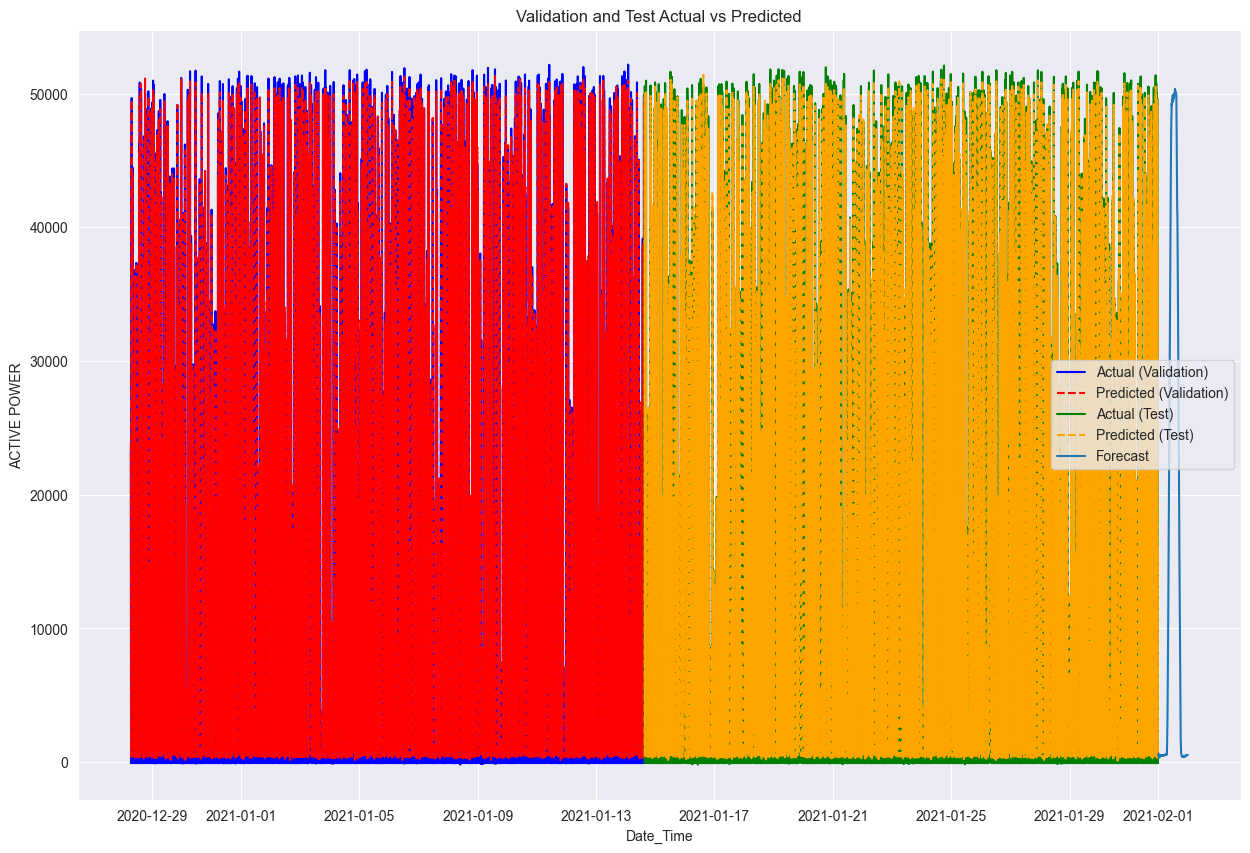

In [63]:
import matplotlib.pyplot as plt

# Plotting in one plot with different labels
plt.figure(figsize=(15, 10))

# Plot validation actual and predicted
plt.plot(y_val_index, y_val2, label='Actual (Validation)', color='blue', linestyle='-')
plt.plot(y_val_index, y_val_pred2, label='Predicted (Validation)', color='red', linestyle='--')

# Plot test actual and predicted
plt.plot(y_test_index, y_test2, label='Actual (Test)', color='green', linestyle='-')
plt.plot(y_test_index, y_test_pred2, label='Predicted (Test)', color='orange', linestyle='--')
plt.plot(df_forecast['Date_Time'], df_forecast['ACTIVE POWER'], label='Forecast')

plt.xlabel('Date_Time')
plt.ylabel('ACTIVE POWER')
plt.title('Validation and Test Actual vs Predicted')
plt.legend()
plt.show()


In [64]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller



# Check for stationarity and difference if necessary
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

for column in df.columns:
    print(f"Column: {column}")
    adf_test(df[column])
    print()

Column: PF
ADF Statistic: -45.49860703612256
p-value: 0.0

Column: REACTIVE POWER
ADF Statistic: -38.353958907009755
p-value: 0.0

Column: DAY HORIZONTAL RADIATION
ADF Statistic: -44.932734722316916
p-value: 0.0

Column: WIND SPEED
ADF Statistic: -65.51671153352747
p-value: 0.0

Column: WIND DIRECTION
ADF Statistic: -13.558010702994208
p-value: 2.339454578548375e-25

Column: HUMIDITY
ADF Statistic: -16.448656338914418
p-value: 2.3899344427304296e-29

Column: RAIN
ADF Statistic: -28.658993595585017
p-value: 0.0

Column: ACTIVE POWER
ADF Statistic: -40.11014127900551
p-value: 0.0



In [65]:


# If the p-value is greater than 0.05 for any series, difference it
# For example, to difference the 'ACTIVE POWER' column:
# df['ACTIVE POWER'] = df['ACTIVE POWER'].diff().dropna()

# Train VAR model
model = VAR(df)


lag_order = model.select_order(maxlags=18)

var_model = model.fit(maxlags=lag_order.aic)

forecast = var_model.forecast(var_model.endog, steps=144)

forecasted_active_power = forecast[:, 7] 
print("Forecasted ACTIVE POWER for next day:")
# print(forecasted_active_power)


c:\Users\Sasanka Jana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Forecasted ACTIVE POWER for next day:


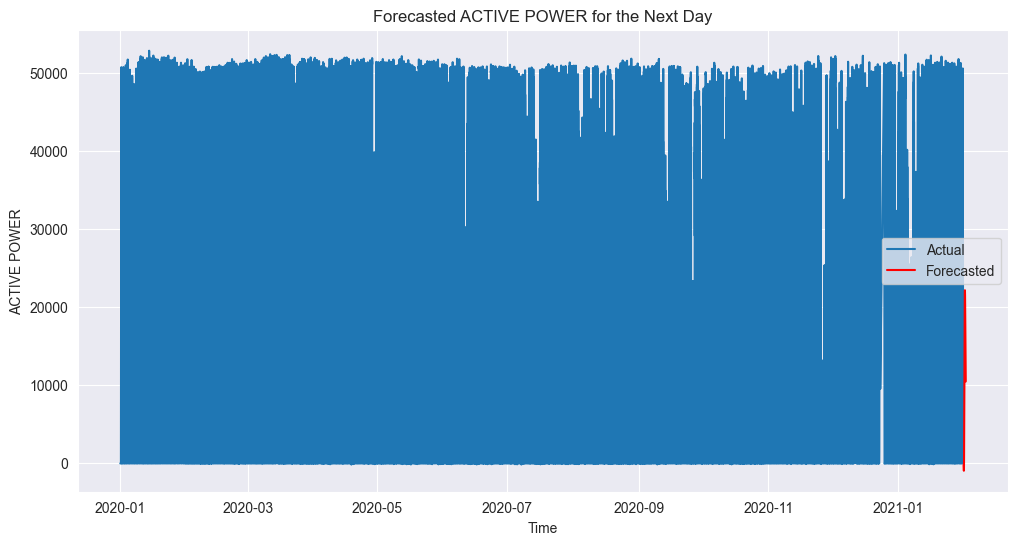

In [66]:
import matplotlib.pyplot as plt

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['ACTIVE POWER'], label='Actual')
plt.plot(pd.date_range(start=df.index[-1], periods=144, freq='10T'), forecasted_active_power, label='Forecasted', color='red')
plt.title('Forecasted ACTIVE POWER for the Next Day')
plt.xlabel('Time')
plt.ylabel('ACTIVE POWER')
plt.legend()
plt.show()
